### Bayesian Data Analysis, 3rd ed
##  Chapter 3, demo 5

원저자:

- Aki Vehtari aki.vehtari@aalto.fi
- Tuomas Sivula tuomas.sivula@aalto.fi
2차저자:

- 문현지, 민태규

Newcomb's data로 정규분포 모형의 사후분포 구하기 (BDA3 p. 66).

BDA 66페이지에 소개된 Simon Newcomb의 빛속도 추정을 위해 빛이 7442m를 이동하는데 걸린 시간의 사후분포를 추정하는 것이 목적입니다.
analytical한 방식과 simulation을 이용한 방식이 있습니다.

전자는 t분포 주변부밀도사후함수를 이용해 µ의 범위를 y ± 1.997s/ 66 = [23.6, 28.8]로 얻었고,
후자는 σ 2 ∼ Inv-χ 2 (65, s 2 )에서 σ를 샘플링 후 조건부사후분포 N(26.2, σ 2 /66)에서 µ를 샘플링하는 방식으로 [23.6, 28.9]를 얻었습니다.

In [20]:
# 초기 세팅
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)
import plot_tools
plt.rc('font', size=12)
plt.style.use(plot_tools.custom_styles['gray_background'])

# 데이터
data_path = os.path.abspath(
    os.path.join(
        os.path.pardir,
        'utilities_and_data',
        'light.txt'
    )
)
y = np.loadtxt(data_path)

## 1. analytical한 방식

(µ, log σ)에 대한 무정보 uniform 사전분포 상황에서 µ의 사후분포는 다음과 같습니다 (p.66).

$$
\frac{\bar{y}-\mu}{s / \sqrt{n}} | \mu \sim t_{n-1}
$$

66개의 y데이터

64개의 y_pos데이터: y > 0라는 조건이 주어졌을때(filtering)

두 경우에 대해 사후분포를 구합니다.

In [21]:
# 원본 데이터

# 충분통계량 s2와 my
n = len(y)
s2 = np.var(y, ddof=1) # ddof=1 -> 표본 추정값이므로 N-1 로 나눠야 unbiased
my = np.mean(y)

# 0기준 filtering
y_pos = y[y > 0]

n_pos = len(y_pos)
s2_pos = np.var(y_pos, ddof=1) # ddof=1 -> 표본 추정값이므로 N-1 로 나눠야 unbiased
my_pos = np.mean(y_pos)

# mu의 범위 설정
tl1 = [10, 40]
t1 = np.linspace(tl1[0], tl1[1], 100)

# mu의 주변부분포의 계산
pm_mu = stats.t.pdf((t1 - my) / np.sqrt(s2/n), n-1) / np.sqrt(s2/n)

# filtered 데이터의 mu값의 정확한 주변부밀도 계산 
pm_mu_pos = (
    stats.t.pdf((t1 - my_pos) / np.sqrt(s2_pos/n_pos), n_pos-1) /
    np.sqrt(s2_pos/n_pos)
)

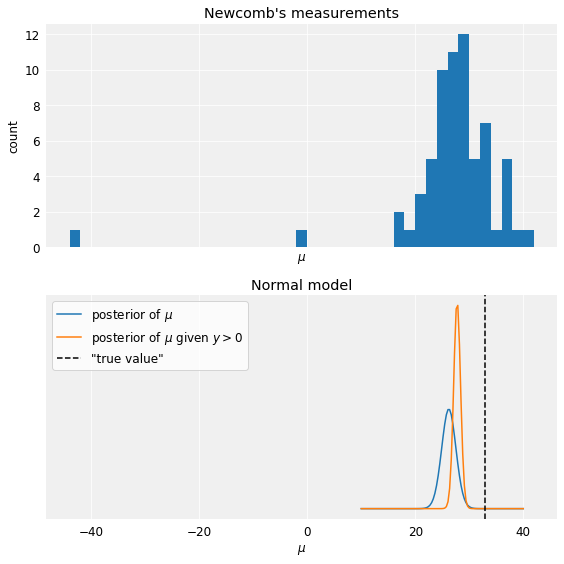

In [22]:
# Plotting

fig, axes = plt.subplots(2, 1, sharex = True, figsize = (8,8))

# 히스토그램
ax = axes[0]
ax.hist(y, np.arange(-44, 43, 2))

ax.set_title('Newcomb\'s measurements')
ax.set_ylabel('count')
ax.set_xlabel('$\mu$')
plt.setp(axes[0].get_xticklabels(), visible=True)

# mu의 사후분포 plot
ax = axes[1]
ax.plot(t1, pm_mu)

# filtered된 데이터로 mu의 사후분포 plot
ax.plot(t1, pm_mu_pos)
# Plot the currently accepted true value
ax.axvline(33, color='k', linestyle='--')
ax.legend(
    ('posterior of $\mu$',
     'posterior of $\mu$ given $y > 0$',
     '"true value"'),
    loc='upper left'
)
ax.set_title('Normal model')
ax.set_xlabel('$\mu$')
ax.set_yticks(())

fig.tight_layout()